In [60]:
import csv
import numpy as np
import keras

###
# 1.データ準備
###
n = 30
X=np.empty((0,30),float)
Y=np.empty((0,2),float)
X_test=np.empty((0,30),float)
Y_test=np.empty((0,2),float)

with open('file/csv/senryudb_labeled.csv', 'r') as f:
    reader = csv.reader(f)
#    header = next(reader)  # ヘッダーを読み飛ばしたい時

    for i,row in enumerate(reader):
#        print(i,row[0],row[1])          # 1行づつ取得できる
        x=[]
        for c in row[0]:
            x.append(np.int.from_bytes(c.encode('utf-8'),'big'))
        xx = np.array(x)
        xx.resize(n,refcheck=False)
        xx = xx.astype('float32')
        y = float(row[1])
        if i < 25000:
            X=np.append(X,[xx],axis=0)
            Y = np.append(Y,keras.utils.np_utils.to_categorical(y, 2),axis=0)
        else:
            X_test=np.append(X_test,[xx],axis=0)
            Y_test = np.append(Y_test,keras.utils.np_utils.to_categorical(y, 2),axis=0)
        if i > 30000:
            break

X=X.reshape(X.shape[0],n,1)
X_test=X_test.reshape(X_test.shape[0],n,1)
# 正規化
X /= 0x1FFFFF
X_test /= 0x1FFFFF

print("end")

In [61]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import Adadelta
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras.layers.core import Dropout
from keras.initializers import TruncatedNormal
from keras.layers import Flatten, Conv1D, MaxPooling1D

###
# 2.モデル設定
###
model = Sequential()
model.add(Conv1D(10, kernel_size=(3),
                 activation='relu',
                 input_shape=(n,1)
                 )
        )
model.add(Conv1D(20, (3), activation='relu'))
model.add(MaxPooling1D(pool_size=(2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(10, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

# 確率的勾配降下法
model.compile(loss='categorical_crossentropy', optimizer=Adadelta(), metrics=['accuracy'])

###
# 3.モデル学習
###
epochs = 12
batch_size = 120
hist = model.fit(X, Y, epochs=epochs, batch_size=batch_size,)
#               validation_data=(X_validation ,Y_validation))


Epoch 1/12
25000/25000 [==============================] - 2s - loss: 0.5082 - acc: 0.8286     
Epoch 2/12
25000/25000 [==============================] - 1s - loss: 0.4850 - acc: 0.8314     
Epoch 3/12
25000/25000 [==============================] - 1s - loss: 0.4821 - acc: 0.8314     
Epoch 4/12
25000/25000 [==============================] - 1s - loss: 0.4751 - acc: 0.8314     
Epoch 5/12
25000/25000 [==============================] - 1s - loss: 0.4719 - acc: 0.8314     
Epoch 6/12
25000/25000 [==============================] - 1s - loss: 0.4675 - acc: 0.8314     
Epoch 7/12
25000/25000 [==============================] - 1s - loss: 0.4670 - acc: 0.8314     
Epoch 8/12
25000/25000 [==============================] - 1s - loss: 0.4652 - acc: 0.8314     
Epoch 9/12
25000/25000 [==============================] - 1s - loss: 0.4623 - acc: 0.8314     
Epoch 10/12
25000/25000 [==============================] - 1s - loss: 0.4608 - acc: 0.8314     
Epoch 11/12
25000/25000 [========================

In [62]:
# 評価
loss_and_metrics = model.evaluate(X_test, Y_test)
print()
print(loss_and_metrics)
# 可視化
val_loss = hist.history['loss']
val_acc = hist.history['acc']
print(val_loss)
print(val_acc)



4704/5002 [===========================>..] - ETA: 0s
[0.497924711550774, 0.80327868853054829]
[0.50821101460456852, 0.48498271317481995, 0.48205091242790221, 0.47507978491783143, 0.4719063379764557, 0.46751194367408755, 0.46696174817085268, 0.46516961259841921, 0.46225146379470827, 0.46080144972801207, 0.4591473762989044, 0.45893209338188173]
[0.82863999900817875, 0.83139999837875367, 0.83139999980926516, 0.83139999837875367, 0.83139999809265142, 0.83140000066757203, 0.83139999942779541, 0.83139999723434443, 0.83139999847412105, 0.83139999780654905, 0.83139999799728392, 0.83139999828338618]


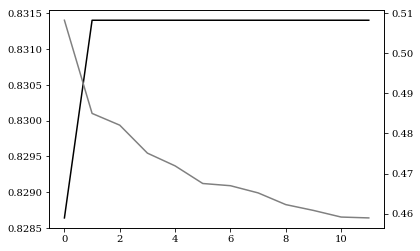

In [63]:
import os

# グラフ

plt.rc('font', family='serif')
fig = plt.figure()
# 精度
ax_acc = fig.add_subplot(111)
ax_acc.plot(range(epochs), val_acc, label='acc', color='black')
# 損失
ax_loss = ax_acc.twinx()
ax_loss.plot(range(epochs), val_loss, label='loss', color='gray')
plt.xlabel('epochs')
#file,ext = os.path.splitext(os.path.basename(__file__))
#plt.savefig(file+'.eps')

plt.show()


In [69]:
# Prediction
import numpy as np
from sklearn.metrics import confusion_matrix

predict = model.predict(X_test[1].reshape(1,n,1), batch_size=32)
#true_classes = np.argmax(y_test[1:10],1)

#print(confusion_matrix(true_classes, predict_classes))


In [70]:
predict

array([[ 0.82426745,  0.17573254]], dtype=float32)

In [72]:
Y_test[1]

array([ 1.,  0.])